In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import linregress

# Introduction

**The English Premier League (EPL) is one of the most prestigious and widely followed football leagues in the world. Over the past three decades, the EPL has seen various clubs compete for the title, making it one of the most competitive football leagues. In this EDA, we will analyze the EPL winners from 1993 to 2023, highlighting key trends, dominant teams, and any interesting insights that emerge.**

In [2]:

csv_file_path = '/kaggle/input/english-premier-league-standings/premier-league-tables.csv'
df = pd.read_csv(csv_file_path)
df.rename(columns={'Season_End_Year': 'Season_End', 'Rk': 'Rank', 'MP': 'Match Played', 'W': 'Wins', 'D': 'Draws',
                  'L': 'Losses', 'GF': 'Goals Scored', 'GA': 'Goals Conceded', 'GD': 'Goals difference', 'Pts': 'Points'}, inplace=True)
df



,Season_End,Team,Rank,Match Played,Wins,Draws,Losses,Goals Scored,Goals Conceded,Goals difference,Points,Notes
0,1993,Arsenal,10,42,15,11,16,40,38,2,56,→ European Cup Winners' Cup via cup win 2
1,1993,Aston Villa,2,42,21,11,10,57,40,17,74,→ UEFA Cup via league finish
2,1993,Blackburn,4,42,20,11,11,68,46,22,71,NaN
3,1993,Chelsea,11,42,14,14,14,51,54,-3,56,NaN
4,1993,Coventry City,15,42,13,13,16,52,57,-5,52,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
621,2023,Nott'ham Forest,16,38,9,11,18,38,68,-30,38,NaN
622,2023,Southampton,20,38,6,7,25,36,73,-37,25,Relegated
623,2023,Tottenham,8,38,18,6,14,70,63,7,60,NaN
624,2023,West Ham,14,38,11,7,20,42,55,-13,40,NaN


In [3]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 626 entries, 0 to 625
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Season_End        626 non-null    int64 
 1   Team              626 non-null    object
 2   Rank              626 non-null    int64 
 3   Match Played      626 non-null    int64 
 4   Wins              626 non-null    int64 
 5   Draws             626 non-null    int64 
 6   Losses            626 non-null    int64 
 7   Goals Scored      626 non-null    int64 
 8   Goals Conceded    626 non-null    int64 
 9   Goals difference  626 non-null    int64 
 10  Points            626 non-null    int64 
 11  Notes             314 non-null    object
dtypes: int64(10), object(2)
memory usage: 58.8+ KB


In [4]:
df.describe()

,Season_End,Rank,Match Played,Wins,Draws,Losses,Goals Scored,Goals Conceded,Goals difference,Points
count,626.000000,626.000000,626.000000,626.000000,626.000000,626.000000,626.000000,626.000000,626.000000,626.000000
mean,2007.865815,10.605431,38.421725,14.263578,9.894569,14.263578,51.234824,51.234824,0.000000,52.666134
std,9.012767,5.842676,1.229416,5.704947,2.973225,5.367384,14.997305,12.774630,24.733459,16.371743
min,1993.000000,1.000000,38.000000,1.000000,2.000000,0.000000,20.000000,15.000000,-69.000000,11.000000
25%,2000.000000,6.000000,38.000000,10.000000,8.000000,10.000000,41.000000,43.000000,-17.000000,41.000000
50%,2008.000000,11.000000,38.000000,13.000000,10.000000,15.000000,48.000000,51.000000,-5.000000,50.000000
75%,2016.000000,16.000000,38.000000,18.000000,12.000000,18.000000,60.000000,59.000000,15.000000,63.000000
max,2023.000000,22.000000,42.000000,32.000000,18.000000,29.000000,106.000000,100.000000,79.000000,100.000000


In [5]:
np.sum(df.isna())


Season_End            0
Team                  0
Rank                  0
Match Played          0
Wins                  0
Draws                 0
Losses                0
Goals Scored          0
Goals Conceded        0
Goals difference      0
Points                0
Notes               312
dtype: int64

# Teams in the EPL


**Teams in the English Premier League (EPL) are the heart and soul of one of the most popular and competitive football leagues in the world. Each team brings its unique history, culture, and style of play to the league, creating a diverse and captivating landscape for football enthusiasts.**

**How many teams are there in English Premier League in a season ?**

In [6]:
teams_per_year = df.groupby('Season_End')['Team'].nunique().reset_index()
teams_per_year.head(5)

,Season_End,Team
0,1993,22
1,1994,22
2,1995,22
3,1996,20
4,1997,20


**There were 22 teams in 3 seasons 1992/1993, 1993/1994 & 1994/1995,later from 1995/1996 onwards teams were reduced to 20 teams per season**

**How many matches are played each season ?**

In [7]:
matches_per_year = df.groupby('Season_End')['Match Played'].sum().reset_index()
matches_per_year.head(5)

,Season_End,Match Played
0,1993,924
1,1994,924
2,1995,924
3,1996,760
4,1997,760


**Similarly when there were 22 teams the number of matches were also more by 164 games per/season, each team used to play 42 matches**

# EPL Title Winners

**Winners in the English Premier League (EPL) are the ultimate beneficiaries of a season's hard-fought battles, strategic brilliance, and unwavering determination. To be crowned EPL champions is a prestigious achievement, and it represents the culmination of a club's efforts over the course of a grueling 38-game season.**

**How many champions are there in EPL from 1993-2023 ?**

In [8]:
title_wins = df[df['Rank'] == 1]
title_counts = title_wins['Team'].value_counts().reset_index()
title_counts

,Team,count
0,Manchester Utd,13
1,Manchester City,7
2,Chelsea,5
3,Arsenal,3
4,Blackburn,1
5,Leicester City,1
6,Liverpool,1


In [9]:
winners = (df[df.Rank == 1])
winners.head()

,Season_End,Team,Rank,Match Played,Wins,Draws,Losses,Goals Scored,Goals Conceded,Goals difference,Points,Notes
11,1993,Manchester Utd,1,42,24,12,6,67,31,36,84,→ Champions League via league finish
32,1994,Manchester Utd,1,42,27,11,4,80,38,42,92,→ Champions League via league finish
46,1995,Blackburn,1,42,27,8,7,80,39,41,89,→ Champions League via league finish
76,1996,Manchester Utd,1,38,25,7,6,73,35,38,82,→ Champions League via league finish
96,1997,Manchester Utd,1,38,21,12,5,76,44,32,75,→ Champions League via league finish


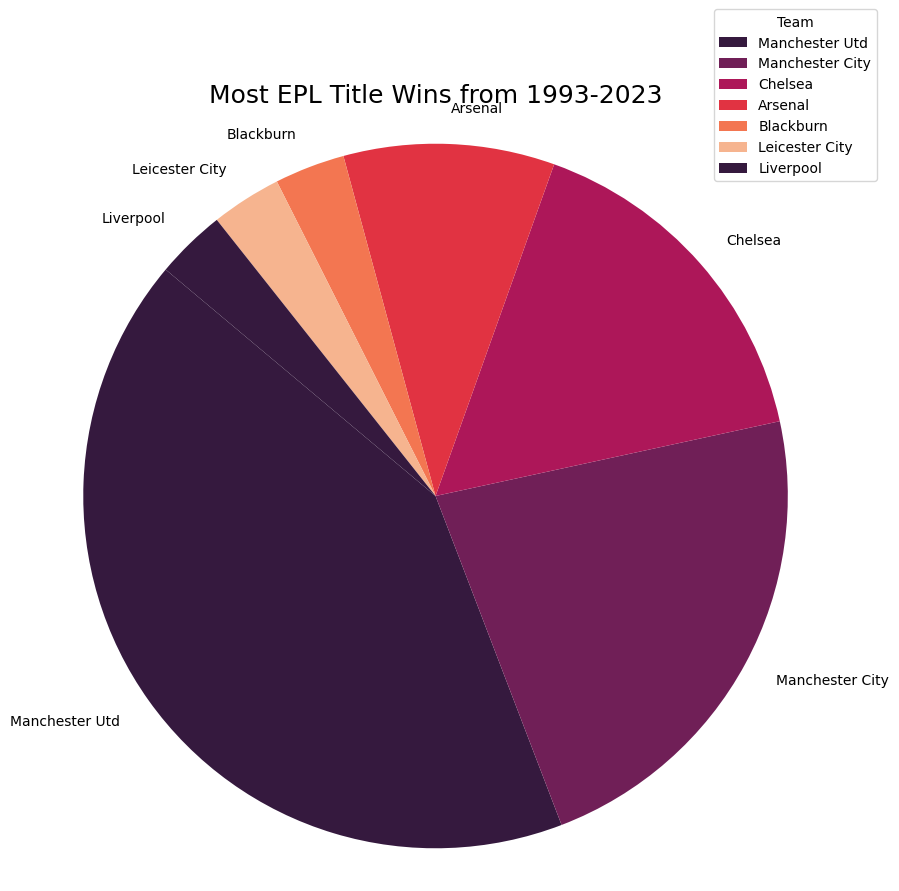

In [10]:
season = winners.Team.value_counts()
plt.figure(figsize=(10, 10))
plt.pie(season.values, labels=season.index, startangle=140, colors=sns.color_palette('rocket'))
plt.title('Most EPL Title Wins from 1993-2023', fontsize=18)
plt.legend(season.index, title='Team', loc='best', bbox_to_anchor=(0.85, 0.9))
plt.axis('equal') 
plt.show()


**This pie chart illustrates that Manchester United has been the most successful club in the EPL, winning the title 13 times during the specified period. Other clubs like Manchester City, Chelsea,and Arsenal, have also had multiple championship wins, shockingly clubs of a caliber like Liverpool won only 1 title whereas Leicester City and Blackburn were totally unexpected underdogs for title wins.**

# Importance of Rank in English Premier League 

**Rank in the English Premier League is vital for the overall health and success of the league, its clubs, and the sport of football in England. It affects everything from financial stability to the quality of players and managers a club can attract, making it a key factor in the sport's continued growth and popularity.**

**Which teams are the Highest Ranked in EPL?**

In [11]:
average_rank = df.groupby('Team')['Rank'].mean().reset_index().sort_values(by='Rank', ascending=True)
average_rank.head(6)

,Team,Rank
27,Manchester Utd,2.451613
0,Arsenal,4.000000
25,Liverpool,4.354839
14,Chelsea,4.838710
26,Manchester City,7.192308
43,Tottenham,7.483871


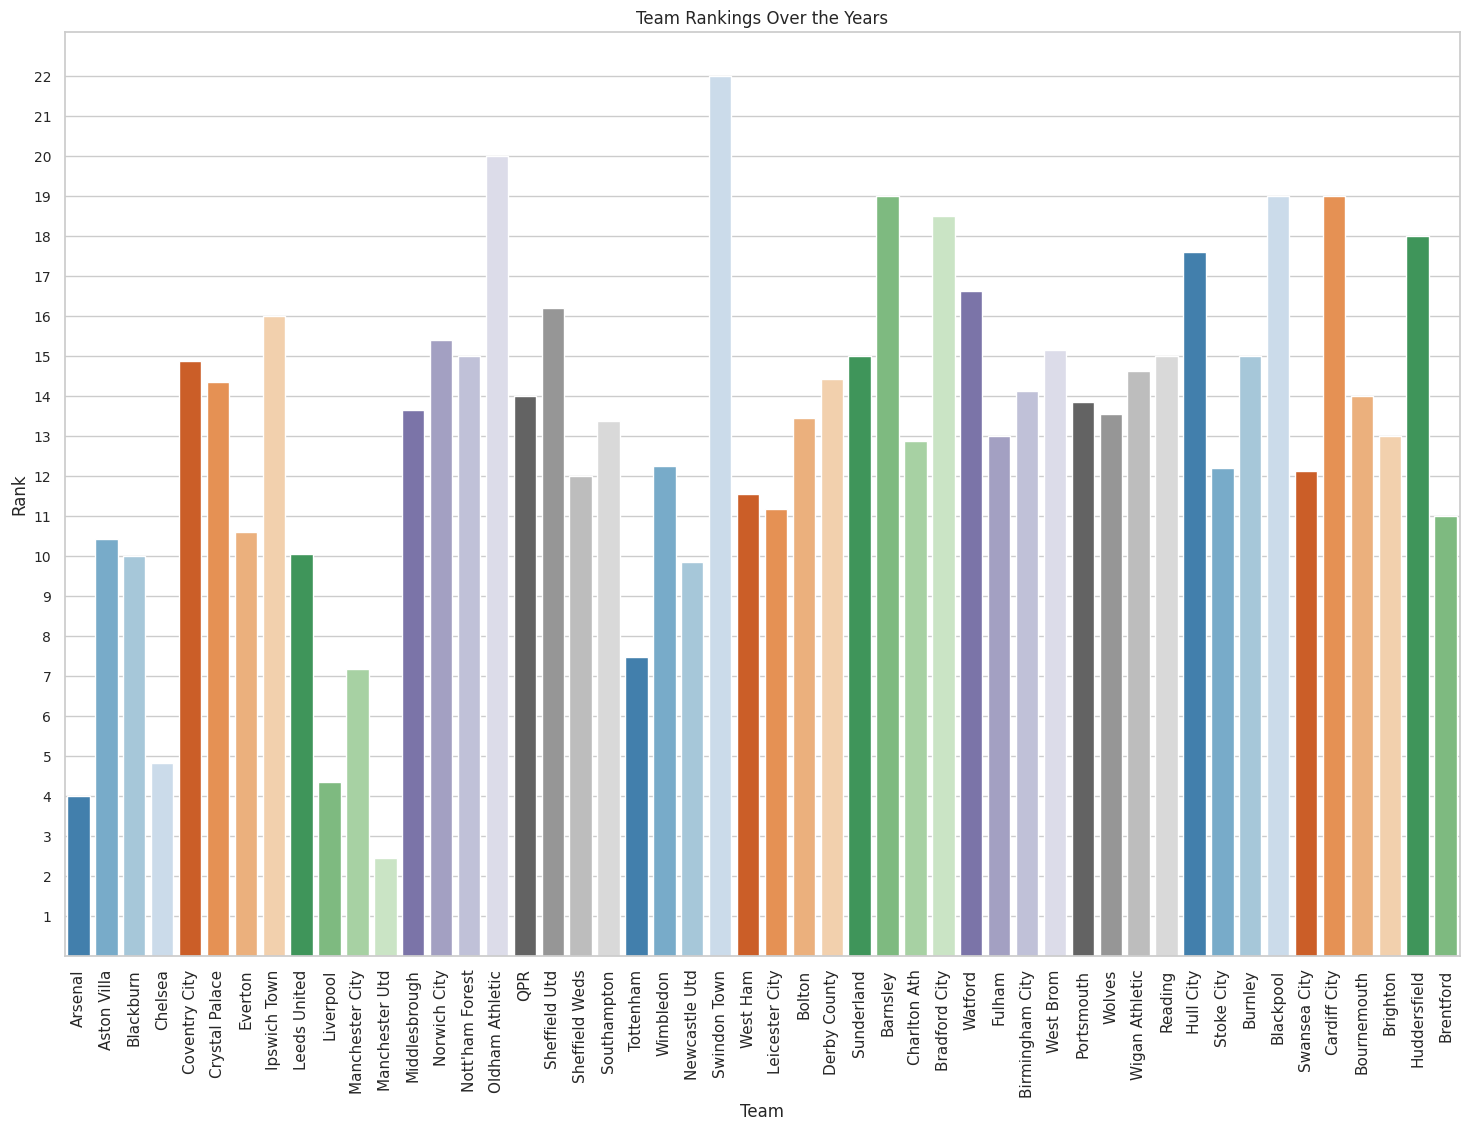

In [12]:
sns.set(style="whitegrid")
plt.figure(figsize=(18, 12))
sns.barplot(x="Team", y="Rank", data=df, errorbar= None,palette='tab20c' )
plt.xticks(rotation=90)
plt.yticks(range(min(df['Rank']), max(df['Rank'])+1,1), fontsize=10)
plt.title("Team Rankings Over the Years")
plt.xlabel("Team")
plt.ylabel("Rank")
plt.show()

**The top 6 teams in the English Premier League (EPL) are the teams that are  frequently discussed and highly competitive. In last 30 years the top 6 teams according to their rankings which is generated by bar plot above are**:
1. Manchester Utd
1. Arsenal
1. Liverpool
1. Chelsea
1. Manchester City
1. Tottenham

# Goals

**Goals in the English Premier League (EPL) are the lifeblood of the sport of football in England and are a central focus of every match, team, and player in the league. The EPL, considered one of the most popular and competitive football leagues in the world, showcases some of the best talents in the sport, and goals are the ultimate measure of a player's skill, a team's performance, and a season's success.**

**How many goals were scored in the English Premier League (EPL) in each season, and which season had the highest number of goals, as well as which season had the lowest number of goals?**

In [13]:
total_goals = df.groupby('Season_End')['Goals Scored'].sum().reset_index()
total_goals

,Season_End,Goals Scored
0,1993,1222
1,1994,1195
2,1995,1196
3,1996,988
4,1997,970
5,1998,1019
6,1999,959
7,2000,1060
8,2001,992
9,2002,1001


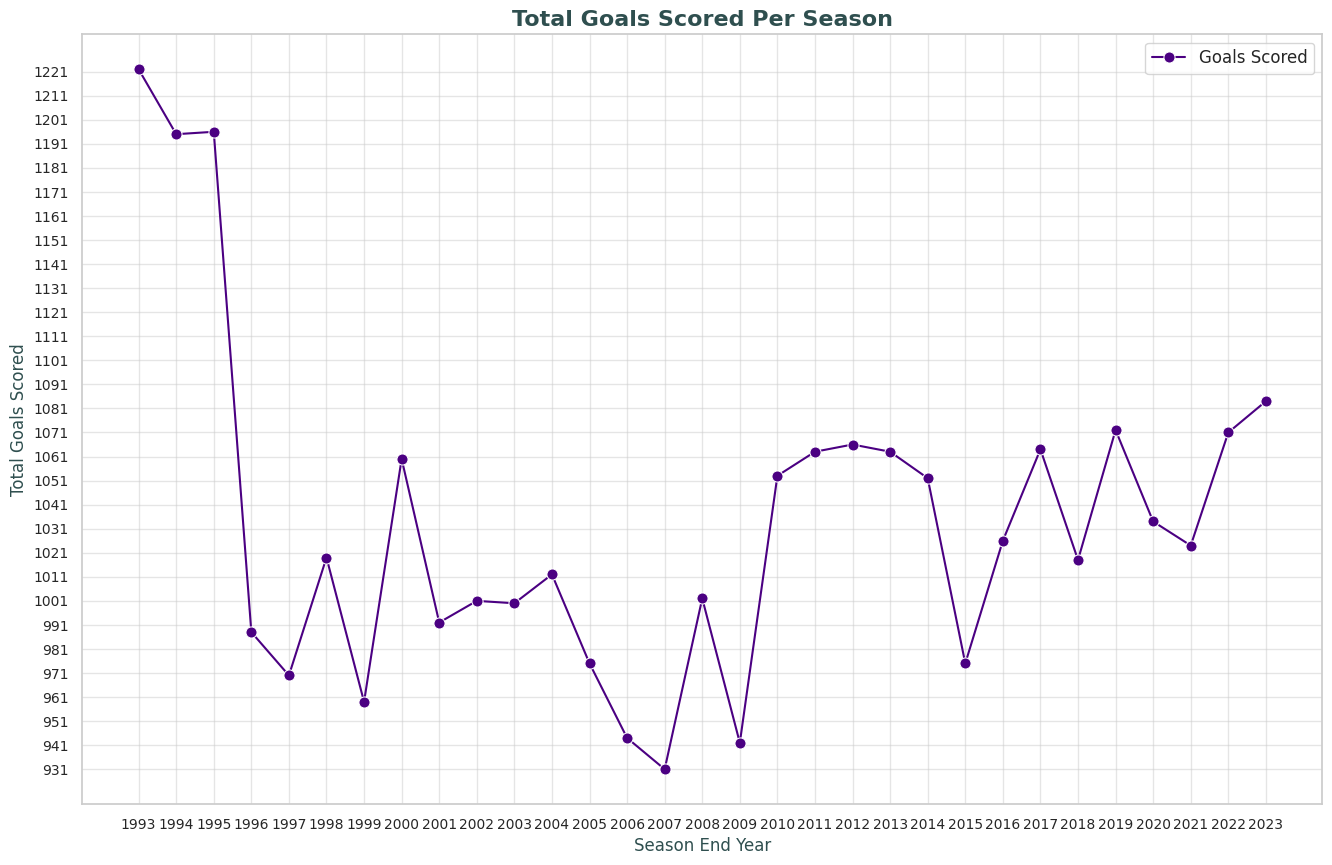

In [14]:
sns.set_style("whitegrid")
plt.figure(figsize=(16, 10))
sns.lineplot(data=total_goals, x='Season_End', y='Goals Scored', color='Indigo', marker='o', markersize=8, label='Goals Scored')
plt.title('Total Goals Scored Per Season', fontsize=16, fontweight='bold', color='darkslategray')
plt.xlabel('Season End Year', fontsize=12, color='darkslategray')
plt.ylabel('Total Goals Scored', fontsize=12, color='darkslategray')
plt.xticks(range(min(total_goals['Season_End']), max(total_goals['Season_End'])+1, 1), fontsize=10)
plt.yticks(range(min(total_goals['Goals Scored']), max(total_goals['Goals Scored'])+1, 10), fontsize=10)

plt.grid(True, alpha=0.5)

plt.legend(fontsize=12)  

plt.show()

**From the Line Plot, we found that in the first three seasons, the highest number of goals was scored, with 1,222 goals in 1993. After the number of teams was reduced to 20, the number of goals drastically fell to 988 in 1996. Then, after some fluctuations, the number of goals finally started to increase from 2022.**

# Correlation

**How does Goals Scored relate to winning?**

In [15]:
GF = df["Goals Scored"]
W = df["Wins"]
correlation = GF.corr(W)
correlation

0.8856457008143132

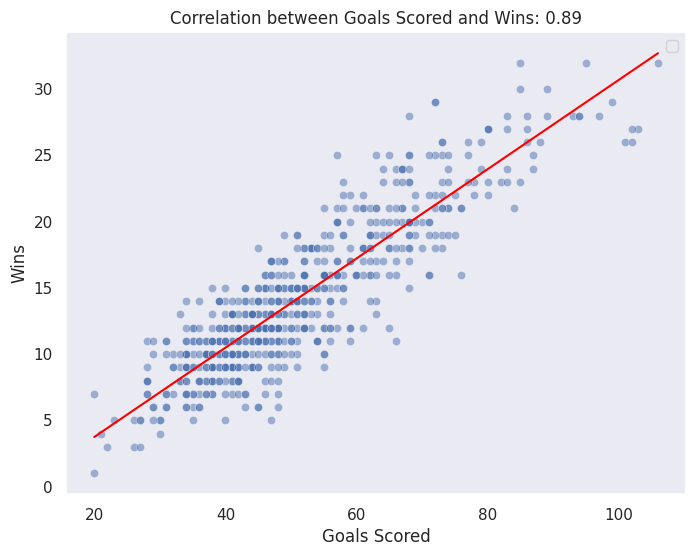

In [16]:
GF = df["Goals Scored"]
W = df["Wins"]

correlation = GF.corr(W)

coefficients = np.polyfit(GF, W, 1)
line = np.poly1d(coefficients)
sns.set_style("dark")
plt.figure(figsize=(8, 6))
sns.scatterplot(x=GF, y=W, alpha=0.5)
sns.lineplot(x=GF, y=line(GF), color='red')
plt.title(f'Correlation between Goals Scored and Wins: {correlation:.2f}')
plt.xlabel('Goals Scored')
plt.ylabel('Wins')
plt.legend()
plt.show()

**Positive correlation = +0.89** 

**How does Goals Conceded relate to winning?**

In [17]:
GA = df["Goals Conceded"]
W = df["Wins"]
correlation = GA.corr(W)
correlation

-0.7796802955062521

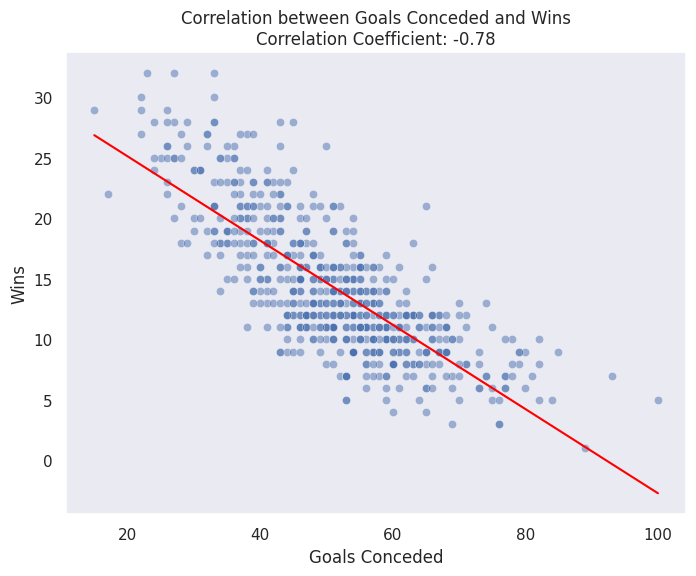

In [18]:
GA = df["Goals Conceded"]
W = df["Wins"]

coefficients = np.polyfit(GA, W, 1)
line = np.poly1d(coefficients)
correlation = GA.corr(W)
sns.set_style("dark")
plt.figure(figsize=(8, 6))
sns.scatterplot(x=GA, y=W, alpha=0.5)
sns.lineplot(x=GA, y=line(GA), color='red')
plt.title(f"Correlation between Goals Conceded and Wins\nCorrelation Coefficient: {correlation:.2f}")
plt.xlabel("Goals Conceded")
plt.ylabel("Wins")
plt.show()


**Negative correlation = -0.78** 

# Competitiveness 

**Competitiveness in the English Premier League (EPL) is one of its defining characteristics and is often cited as one of the reasons for its global popularity. The EPL is widely regarded as one of the most competitive football leagues in the world.**

**How close was it between winner and runner-up ?**

In [19]:
winners_teams = df[df['Rank'] == 1]
winners_teams_points = winners_teams[['Season_End', 'Team', 'Points']]
winners_teams_points

,Season_End,Team,Points
11,1993,Manchester Utd,84
32,1994,Manchester Utd,92
46,1995,Blackburn,89
76,1996,Manchester Utd,82
96,1997,Manchester Utd,75
106,1998,Arsenal,78
137,1999,Manchester Utd,79
156,2000,Manchester Utd,91
179,2001,Manchester Utd,80
186,2002,Arsenal,87


In [20]:
runnersup_teams = df[df['Rank'] == 2]
runnersup_teams_points = runnersup_teams[['Season_End', 'Team', 'Points']]
runnersup_teams_points

,Season_End,Team,Points
1,1993,Aston Villa,74
24,1994,Blackburn,84
56,1995,Manchester Utd,88
78,1996,Newcastle Utd,78
98,1997,Newcastle Utd,68
119,1998,Manchester Utd,77
126,1999,Arsenal,78
146,2000,Arsenal,73
166,2001,Arsenal,70
198,2002,Liverpool,80


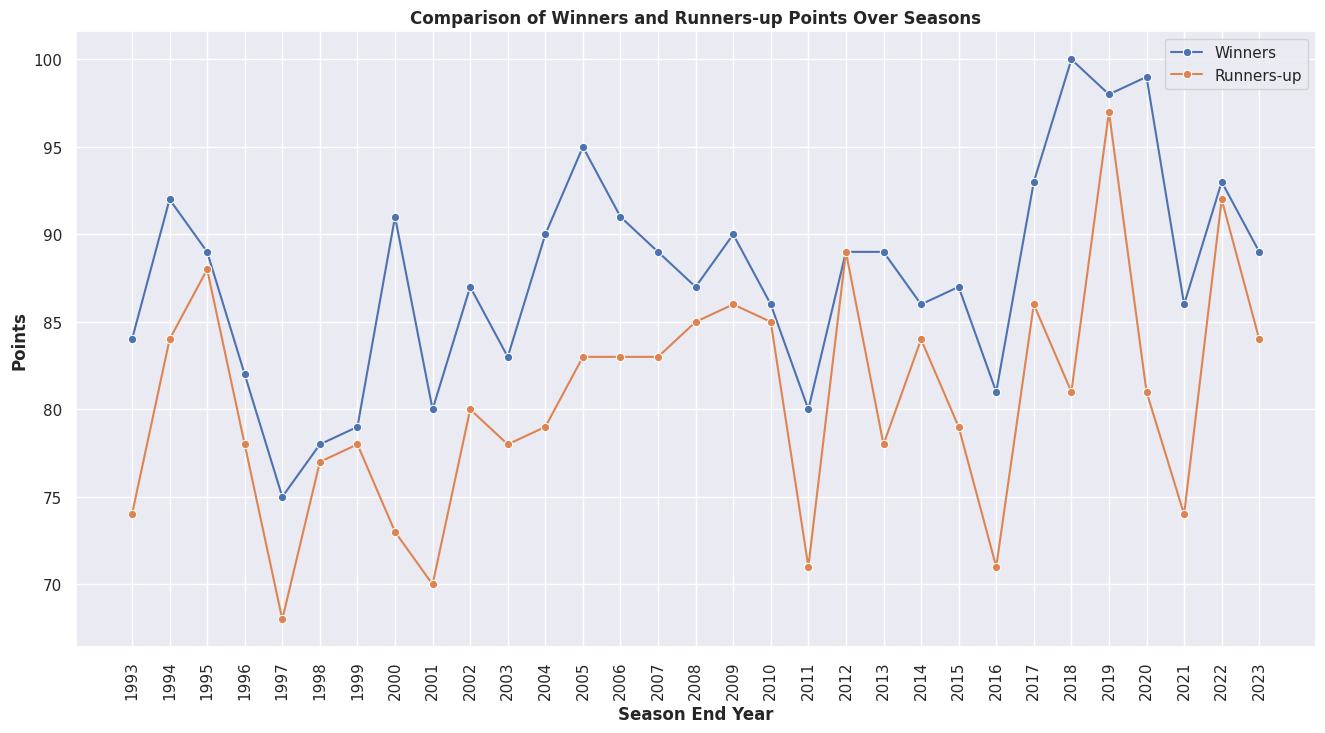

In [21]:
sns.set(style="dark")
plt.figure(figsize=(16, 8))
sns.lineplot(data=winners_teams_points, x='Season_End', y='Points', label='Winners', marker='o')
sns.lineplot(data=runnersup_teams_points, x='Season_End', y='Points', label='Runners-up', marker='o')
plt.xlabel('Season End Year',fontweight='bold')
plt.ylabel('Points', fontweight='bold')
plt.title('Comparison of Winners and Runners-up Points Over Seasons', fontweight='bold')
plt.xticks(range(min(winners_teams_points['Season_End']), max(winners_teams_points['Season_End']) + 1), rotation=90)
plt.legend()
plt.grid(True)
plt.show()


**There have been several seasons in the English Premier League where the points difference between the winner and the runner-up was remarkably close. However, one of the most memorable instances of such a tight race occurred in the 2011-2012 season when Manchester City and Manchester United battled fiercely for the title. Ultimately, it was Manchester City who clinched the championship, making it a season etched in football history for its dramatic conclusion.**

# Goal Difference

**Goal difference in football is a critical tiebreaker and a significant statistic that can have a profound impact on league standings and championship outcomes. It reflects the disparity between the number of goals a team scores and the number of goals it concedes over the course of a season.**

How does Goal Difference decide the title ?

In [22]:
selected_columns = ['Team', 'Rank', 'Points', 'Wins', 'Losses', 'Draws', 'Goals Scored', 'Goals Conceded', 'Goals difference']
manchester_city_2012 = df[(df['Season_End'] == 2012) & (df['Team'] == 'Manchester City')][selected_columns]
manchester_city_2012

,Team,Rank,Points,Wins,Losses,Draws,Goals Scored,Goals Conceded,Goals difference
394,Manchester City,1,89,28,5,5,93,29,64


In [23]:
selected_columns = ['Team', 'Rank', 'Points', 'Wins', 'Losses', 'Draws', 'Goals Scored', 'Goals Conceded', 'Goals difference']
manchester_united_2012 = df[(df['Season_End'] == 2012) & (df['Team'] == 'Manchester Utd')][selected_columns]
manchester_united_2012

,Team,Rank,Points,Wins,Losses,Draws,Goals Scored,Goals Conceded,Goals difference
395,Manchester Utd,2,89,28,5,5,89,33,56


**In the 2011-2012 EPL season, Manchester City and Manchester United engaged in an epic title race. Both teams finished the season with 89 points, an extraordinary level of parity. However, what made this season truly remarkable was the goal difference. As a result, both teams finished the season with the same number of points, but Manchester City had a superior goal difference of +64, while Manchester United had +56.**

# European Cup Competition

**For a football club, qualifying for a European Cup competition is a testament to its talent, dedication, and hard work. It opens the doors to a world of opportunity and excitement, allowing the club and its fans to dream of achieving greatness on the continental stage. It is a journey that encapsulates the essence of football's passion and glory, where the pursuit of excellence is celebrated and cherished.**

**Which team qualified most for the European Cup Competition in EPL ?**

In [24]:
European_cup = df[(df['Notes'].notna()) & (df['Notes'] != 'Relegated')]
European_cup


,Season_End,Team,Rank,Match Played,Wins,Draws,Losses,Goals Scored,Goals Conceded,Goals difference,Points,Notes
0,1993,Arsenal,10,42,15,11,16,40,38,2,56,→ European Cup Winners' Cup via cup win 2
1,1993,Aston Villa,2,42,21,11,10,57,40,17,74,→ UEFA Cup via league finish
11,1993,Manchester Utd,1,42,24,12,6,67,31,36,84,→ Champions League via league finish
13,1993,Norwich City,3,42,21,9,12,61,65,-4,72,→ UEFA Cup via league finish 1
22,1994,Arsenal,4,42,18,17,7,53,28,25,71,→ UEFA Cup Winners' Cup
...,...,...,...,...,...,...,...,...,...,...,...,...
610,2023,Brighton,6,38,18,8,12,72,53,19,62,→ Europa League via league finish
617,2023,Liverpool,5,38,19,10,9,75,47,28,67,→ Europa League via league finish
618,2023,Manchester City,1,38,28,5,5,94,33,61,89,→ Champions League via league finish
619,2023,Manchester Utd,3,38,23,6,9,58,43,15,75,→ Champions League via league finish


In [25]:
european_qualification_counts = European_cup.groupby('Team')['Notes'].count().reset_index().sort_values(by='Notes', ascending=False)
european_qualification_counts.columns = ['Team', 'Notes']
european_qualification_counts

,Team,Notes
18,Manchester Utd,30
0,Arsenal,29
8,Chelsea,26
16,Liverpool,25
27,Tottenham,17
17,Manchester City,16
20,Newcastle Utd,13
1,Aston Villa,12
3,Blackburn,7
10,Everton,7


**United is one of the most successful clubs in English football history and has consistently qualified for the UEFA Champions League over the years.**

# Relegations

**Relegation is a crucial and often heart-wrenching aspect of the English Premier League (EPL) and many other football leagues around the world. It's a system that adds drama and excitement to the competition, but it can also bring disappointment and financial consequences for the teams involved.**

**Which teams and how many times it has been relegated?**

In [26]:
relegated_teams = df[df['Notes'].str.contains('Relegated', na=False)]
relegated_teams

,Season_End,Team,Rank,Match Played,Wins,Draws,Losses,Goals Scored,Goals Conceded,Goals difference,Points,Notes
5,1993,Crystal Palace,20,42,11,16,15,48,61,-13,49,Relegated
12,1993,Middlesbrough,21,42,11,11,20,54,75,-21,44,Relegated
14,1993,Nott'ham Forest,22,42,10,10,22,41,62,-21,40,Relegated
35,1994,Oldham Athletic,21,42,9,13,20,42,68,-26,40,Relegated
37,1994,Sheffield Utd,20,42,8,18,16,42,60,-18,42,Relegated
...,...,...,...,...,...,...,...,...,...,...,...,...
600,2022,Norwich City,20,38,5,7,26,23,84,-61,22,Relegated
603,2022,Watford,19,38,6,5,27,34,77,-43,23,Relegated
615,2023,Leeds United,19,38,7,10,21,48,78,-30,31,Relegated
616,2023,Leicester City,18,38,9,7,22,51,68,-17,34,Relegated


In [27]:
relegated_teams_counts = relegated_teams.groupby('Team')['Notes'].count().reset_index().sort_values(by='Notes', ascending=False)
relegated_teams_counts.head()

,Team,Notes
23,Norwich City,6
37,West Brom,5
21,Middlesbrough,4
36,Watford,4
12,Crystal Palace,4


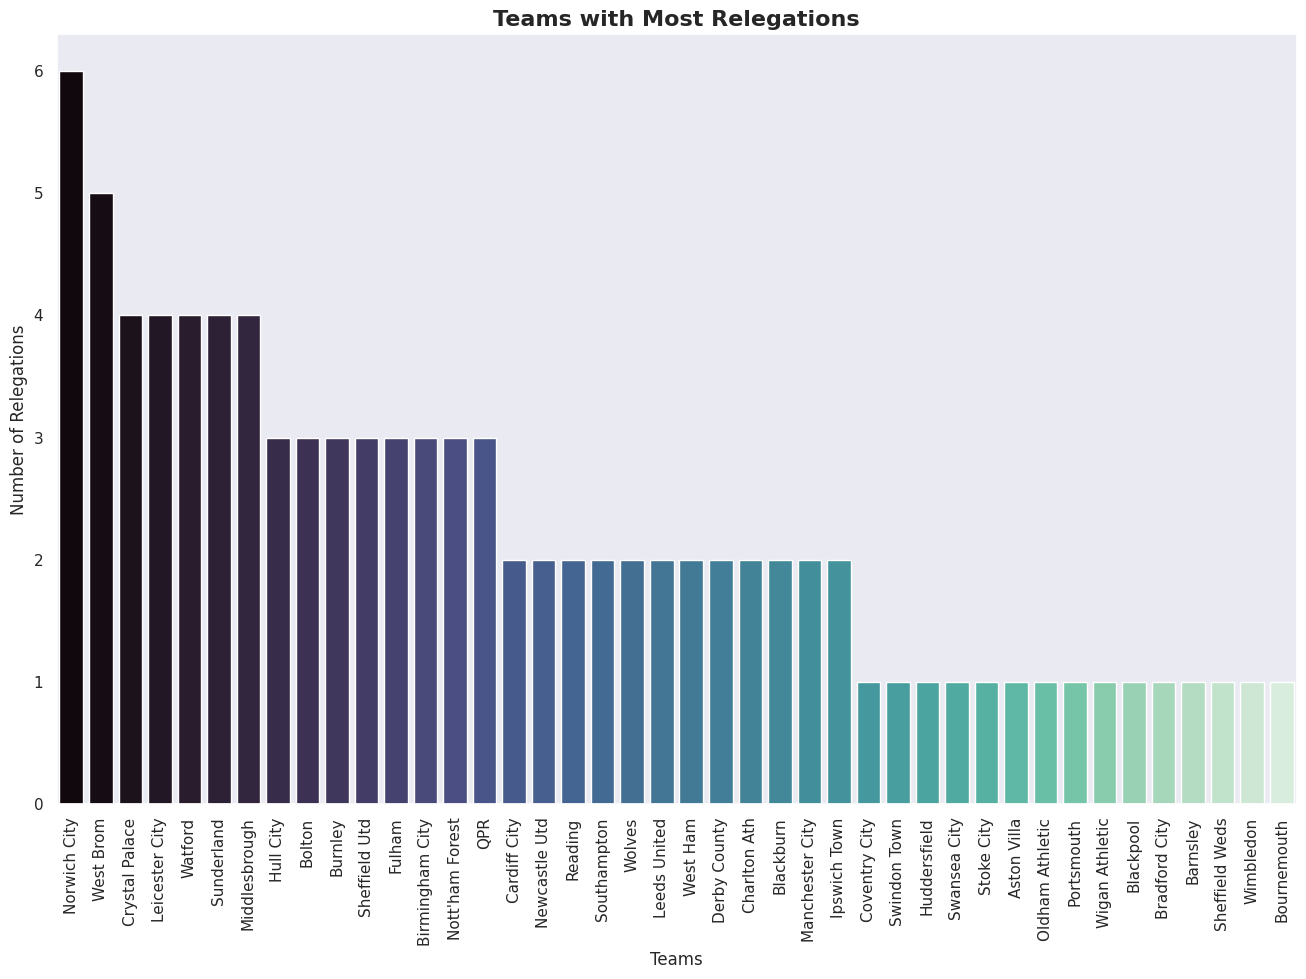

In [28]:
relegation_counts = relegated_teams['Team'].value_counts()
plt.figure(figsize=(16, 10))
sns.barplot(x=relegation_counts.index, y=relegation_counts.values, palette="mako")
plt.xticks(rotation=90)
plt.xlabel("Teams", fontsize=12)
plt.ylabel("Number of Relegations", fontsize=12)
plt.title("Teams with Most Relegations", fontsize=16, fontweight='bold')
plt.show()

**From the plot we can clearly see that Norwich Norwich City has been relegated from the Premier League multiple times over the years. They have experienced relegation on 6 seasons.**

# Famous Seventeenth position in EPL

**Finishing in seventeenth position in the English Premier League (EPL) is a precarious and often nerve-wracking experience for a football club. This position is just one spot above the relegation zone, and it carries significant implications for the team's future in the top flight of English football.**

In [29]:
surviving_teams = df[df['Rank'] == 17]
surviving_teams_counts = surviving_teams['Team'].value_counts().reset_index()
surviving_teams_counts

,Team,count
0,Everton,4
1,Southampton,3
2,Sunderland,3
3,Leeds United,2
4,Aston Villa,2
5,West Brom,2
6,Hull City,1
7,Brighton,1
8,Watford,1
9,QPR,1


**Everton has a proud history and a strong desire to compete at the highest level of English football. While they may have faced relegation battles in the past, the club has typically managed to navigate through these challenging periods and reestablish itself.**